<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/NhanDien(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D,MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2

In [15]:
train_list = glob.glob('/content/drive/MyDrive/NhanDien/Train/*.jpg')
train_list.sort()
print (train_list)

['/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_00.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_01.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_02.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_03.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_04.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_05.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_06.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_07.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_08.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_09.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh1.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh10.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh2.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh3.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh4.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh5.

In [16]:
test_list = glob.glob('/content/drive/MyDrive/NhanDien/Test/*.jpg')
test_list.sort()
print (test_list)

['/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_00.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_01.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_02.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_03.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_04.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_05.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_06.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_07.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_08.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_09.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_00.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_01.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_02.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_03.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_04.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy o

In [17]:
x_train = np.zeros([len(train_list),150,150,3],dtype=np.uint8)

for i in range(len(train_list)):
  image = load_img(train_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_train[i] = array

x_test = np.zeros([len(test_list),150,150,3],dtype=np.uint8)

for i in range(len(test_list)):
  image = load_img(test_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_test[i] = array

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [18]:
y_train = np.zeros([len(train_list)])
y_test = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

for i in range (len(train_list)):
  if i>21 and i<=len(train_list):
    y_train[i] = 1
  else:
    y_train[i] = 0
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)
y_label = ['0','1']


In [19]:
#Tạo mô hình CNN
model=Sequential()
#Block 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(150,150,3)))
 #32 sau conv2d là số lần học vs kích thước 3x3 của kernel, input shape là 32x32, 3 kênh màu
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Tạo ANN
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=100,batch_size = 128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.8068 - accuracy: 0.5500 - val_loss: 19.4586 - val_accuracy: 0.3226
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 17.7599 - accuracy: 0.4500 - val_loss: 3.2892 - val_accuracy: 0.6774
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 4.5258 - accuracy: 0.5500 - val_loss: 0.4421 - val_accuracy: 0.8387
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 0.3890 - accuracy: 0.8750 - val_loss: 4.5237 - val_accuracy: 0.3226
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 3.9122 - accuracy: 0.4500 - val_loss: 0.5263 - val_accuracy: 0.6774
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.3929 - accuracy: 0.9500 - val_loss: 0.6170 - val_accuracy: 0.6774
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.7682 - accuracy: 0.5500 - val_loss: 0.4943 - val_accuracy: 0.6774
Epoch 8/100
1/1 [===============

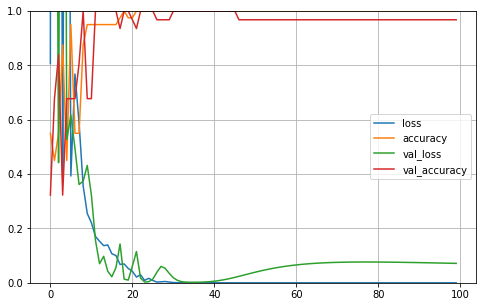

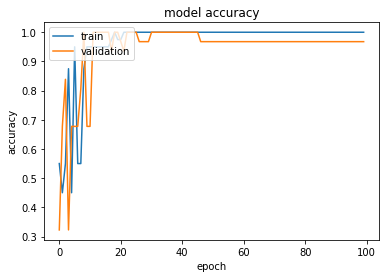

In [21]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

picture  9
picture  9
predictions number: [0]
predictions: 0


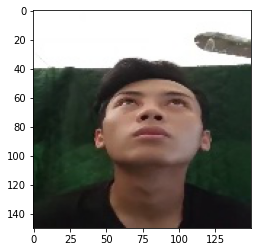

In [33]:
i = randint(0,len(test_list)-1)
print ('picture ',i)
predict_test = test_list[i]
image = load_img(predict_test,target_size=(150,150))
array = img_to_array(image)
plt.imshow(image)
# Sample Predict
sample = np.array([array])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('picture ',i)
print("predictions number:", predictions)
print("predictions:", y_label[int(predictions)])